In [2]:
%matplotlib inline
from bigbang.archive import Archive
from bigbang.analysis import repo_loader
from bigbang.git_repo import GitRepo, ALL_ATTRIBUTES
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
repo = repo_loader.get_repo("bigbang", in_type="name")
full_info = repo.commit_data;
# repo.commit_data

Checking if cached
Running Entity Resolution on bigbang


In [6]:
print((full_info.columns))

Index([u'Unnamed: 0', u'Commit Message', u'Committer Email', u'Committer Name', u'HEXSHA', u'Parent Commit', u'Time', u'Touched File', u'Person-ID'], dtype='object')


In [7]:
import networkx as nx

In [8]:
G = nx.Graph()


def add_to_graph(r):  # Adds info from row to graph
    author = r["Committer Name"]
    files = r["Touched File"]
    for f in files:
        if G.has_edge(author, f):
            G[author][f]["weight"] += 1
        else:
            G.add_edge(author, f, weight=1)
            G.node[author]["type"] = "author"
            G.node[f]["type"] = "file"


a = full_info.apply(add_to_graph, axis=1)  # Dummy to make it not print
widths = [G[u][v]["weight"] / 20.0 for u, v in G.edges()]

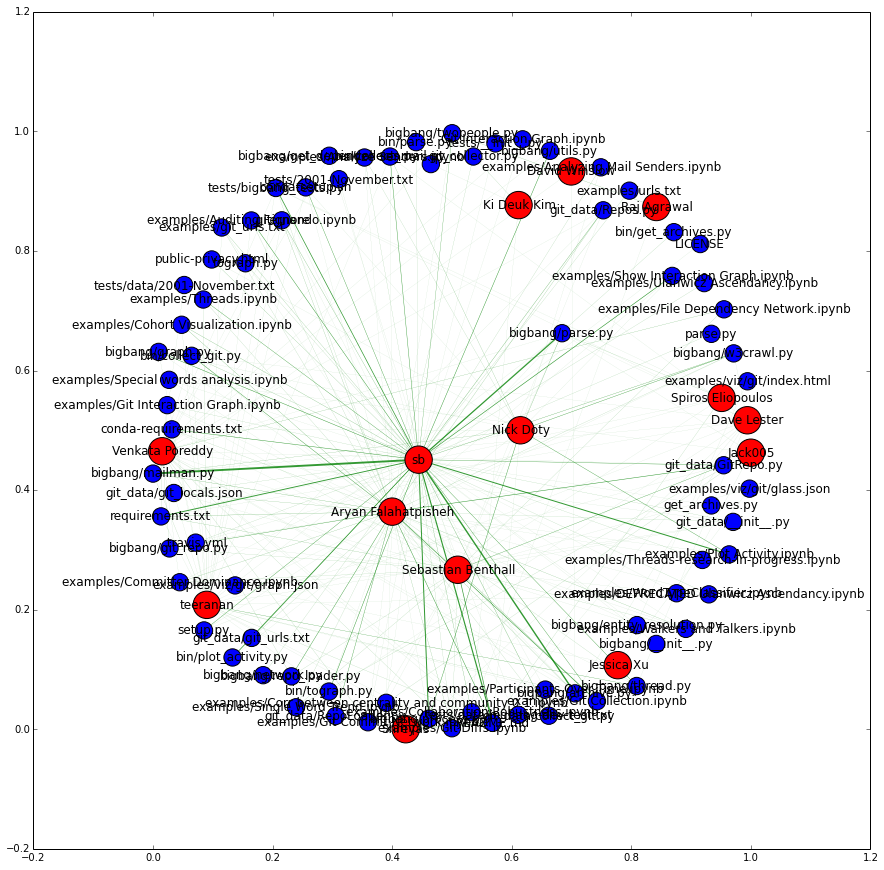

In [9]:
# nx.draw(G)
plt.figure(1, figsize=(15, 15))
pos = nx.spring_layout(G, k=0.6, iterations=20)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=[node[0] for node in G.nodes(data=True) if node[1]["type"] == "author"],
    node_size=750,
    node_color="r",
)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=[node[0] for node in G.nodes(data=True) if node[1]["type"] == "file"],
    node_color="b",
)
nx.draw_networkx_edges(G, pos, width=widths, edge_color="g", alpha=0.8)
# nx.draw_networkx_edges(G, pos, width=widths, edge_color = widths)
nx.draw_networkx_labels(G, pos);

In [10]:
from networkx.readwrite import json_graph

data = json_graph.node_link_data(G)

In [11]:
import json

with open("viz/git/graph.json", "w") as outfile:
    json.dump(data, outfile, indent=4)